# Figure out Sample Sizes for your Study
**This is a crucial, since it significantly impacts the cost of your study and the reliability of your results.**
* Collect too much sample: you’ve wasted money and time. 
* Collect too little: your results may be useless.


> **Here’s the scenario:** you are doing a study on a marketing effort that’s intended to increase the proportion of women entering your store (say, a change in signage). Suppose you want to know whether the change actually increased the proportion of women walking through. You’re planning on collecting the data before and after you change the signs and determine if there’s a difference. You’ll be using a two-proportion Z test for comparing the two proportions. You’re unsure how long you’ll need to collect the data to get reliable results – you first have to figure out how much sample you need!

## Overview of the Two Proportion Z test
The [two sample Z test for proportions](https://onlinecourses.science.psu.edu/stat414/node/268/) determines whether a population proportion $p_1$ is equal to another population proportion $p_2$. 

In our example, $p_1$ and $p_2$ are the proportion of women entering the store before and after the marketing change (respectively), and we want to see whether there was a statistically significant increase in $p_2$ over $p_1$, i.e. $p_2 > p_1$.

In [1]:
import math
import numpy as np
from scipy import stats
import pandas as pd
import seaborn as sns

def z_calc(p1, p2, n1, n2):
    p_star = (p1*n1 + p2*n2) / (n1 + n2)
    return (p2 - p1) / math.sqrt(p_star*(1 - p_star)*((1.0 / n1) + (1.0 / n2)))

def sample_required(p1, p_diff, alpha):
    if p_diff <= 0:
        raise ValueError("p_diff must be > 0")
    n = 1
    while True:
        z = z_calc(p1, p1+p_diff, n1=n, n2=n)
        p = 1 - stats.norm.cdf(z)
        if p < alpha:
            break
        n += 1
    return n

## What $p_1$ that would require the biggest sample size to determine a given difference with $p_2$?

Let’s say we want to be able to calculate a $5$% difference with $95$% confidence level, and we need to find a $p_1$ that gives us the largest sample required. We first generate a `list` in Python of all the $p_1$ to look at, from $0$% to $95$% and then use the `sample_required` function for each difference to calculate the sample.

In [2]:
#Map how sample size changes as choice of p1 changes, holding all 
#else constant.

p1s = [x*.01 for x in range(96)]
p_diff = 0.05

data = []
for p1 in p1s:
    record = {}
    record['Probability Difference'] = p_diff
    record['Sample Size to Detect Difference'] = sample_required(p1=p1,
                                                                p_diff=.05,
                                                                alpha=.05)
    record['Confidence Level'] = '95%'
    record['Initial Probability'] = p1 * 100
    data.append(record)
    
df = pd.DataFrame(data)

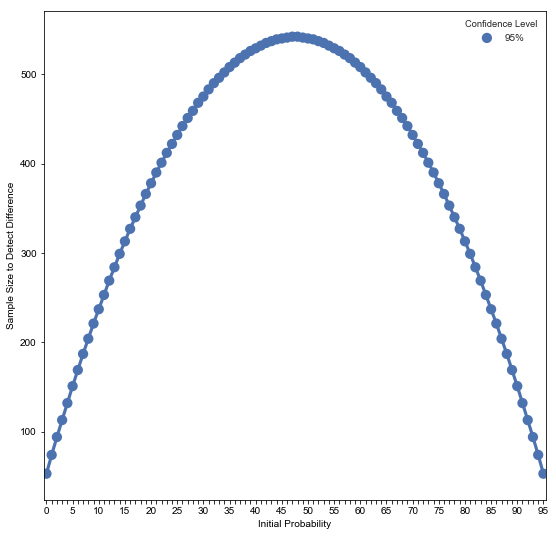

In [3]:
from matplotlib import pyplot

fig, ax = pyplot.subplots(figsize=(9, 9))
sns.set(style='darkgrid')

plot = sns.pointplot(x='Initial Probability',
            y='Sample Size to Detect Difference',
            hue='Confidence Level', ax = ax,
            data=df)

labels = []
for i in range(0, 101):
    if i % 5 == 0:
        labels.append(str(i))
    else:
        labels.append('')
plot.set_xticklabels(labels=labels);

This plot makes it clear that $p_1 = 50$% produces the highest sample sizes.

Using this information, let’s say we want to calculate the sample sizes required to calculate differences in $p_1$ and $p_2$ where $p_2 – p_1$ is between $2$% and $10$%, and confidence levels are $95$% or $99$%. To ensure we get a sample large enough, we know to set $p_1 = 50$%.

In [4]:
#Observe probability difference from 2% to 10%
p_diffs = [x*.01 for x in range(2,11)]

data = []
for p_diff in p_diffs:
    record = {}
    record['Probability Difference'] = p_diff * 100
    record['Sample Size to Detect Difference'] = sample_required(p1=.5,
                                                                p_diff=p_diff,
                                                                alpha=.05)
    record['Confidence Level'] = '95%'
    record['Initial probability'] = '50%'
    data.append(record)

for p_diff in p_diffs:
    record = {}
    record['Probability Difference'] = p_diff * 100
    record['Sample Size to Detect Difference'] = sample_required(p1=.5,
                                                                p_diff=p_diff,
                                                                alpha=.01)
    record['Confidence Level'] = '99%'
    record['Initial probability'] = '50%'
    data.append(record)

df = pd.DataFrame(data)

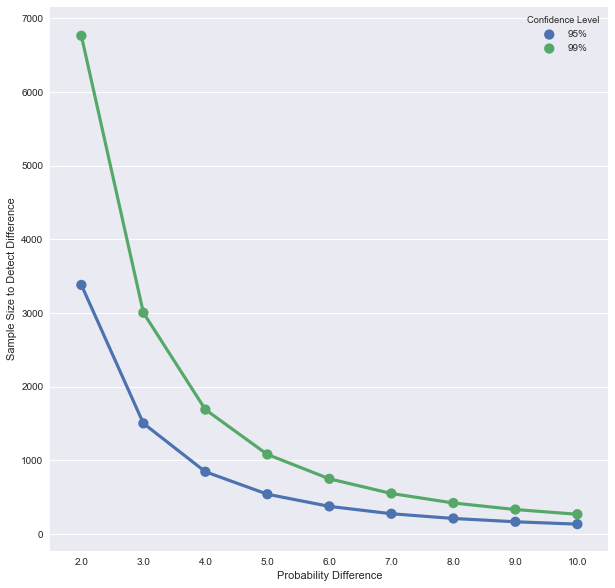

In [5]:
from matplotlib import pyplot
fig, ax = pyplot.subplots(figsize=(10, 10))

sns.set(style='darkgrid')

plot = sns.pointplot(x='Probability Difference',
            y='Sample Size to Detect Difference',
            hue='Confidence Level', ax = ax,
            data=df)

This shows the minimum sample required to detect probability differences between $2$% and $10$%, for both $95$% and $99$% confidence levels. So, for example, detecting a difference of $2$% at $95$% confidence level requires a sample of ~$3,500$, which translates into $n_1 = n_2 = 1,750$. 

So, in our example, you would need about $1,750$ people walking into the store before the marketing intervention, and $1,750$ people after to detect a $2$% difference in probabilities at a $95$% confidence level.